In [3]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat # Library to get mat files from SVHN Dataset
import matplotlib.image as img # Get images and make them matrices from Celeb A
from os import listdir # Get jpg images from Celeb A
from os.path import isfile, join # Just to get structure of files
from tempfile import TemporaryFile # To save matrix of images
import matplotlib.pyplot as plt
import sys
import logging
import os
import cloudstorage as gcs
from google.cloud import storage
# import webapp2
# from google.appengine.api import app_identity
# from google.appengine.api import images
import io
from PIL import Image
sys.path.append("..") # To get our .pys
from image_gen import ImageCollector 
import imageio

In [13]:
client = storage.Client()
# https://console.cloud.google.com/storage/browser/[bucket-id]/
bucket = client.get_bucket('inpainting-final-project')

DefaultCredentialsError: Could not automatically determine credentials. Please set GOOGLE_APPLICATION_CREDENTIALS or explicitly create credentials and re-run the application. For more information, please see https://cloud.google.com/docs/authentication/getting-started

In [4]:
bucket

<Bucket: inpainting-final-project>

In [12]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [6]:
# blobs = bucket.list_blobs()

blobs = bucket.list_blobs(prefix='images/Cars/cars_train/')
images = [] 
for blob in blobs:
    blob = bucket.get_blob(blob.name)
    s = blob.download_as_string()
    img = Image.open(io.BytesIO(s))
    resized_img = cv2.resize(np.asarray(img),(64,64))
    if resized_img.shape == (64,64,3):
        images.append(resized_img)
 

In [7]:
images[0]

array([[[ 84, 102, 106],
        [ 94, 112, 116],
        [ 70,  92,  97],
        ...,
        [247, 251, 252],
        [252, 255, 255],
        [247, 253, 253]],

       [[ 84, 102, 106],
        [ 98, 116, 120],
        [ 89, 108, 114],
        ...,
        [244, 253, 252],
        [243, 252, 251],
        [242, 248, 248]],

       [[ 92, 110, 113],
        [ 82, 100, 104],
        [ 87, 104, 110],
        ...,
        [242, 251, 251],
        [239, 249, 248],
        [243, 249, 249]],

       ...,

       [[173, 175, 164],
        [167, 164, 153],
        [166, 166, 158],
        ...,
        [171, 168, 159],
        [173, 169, 161],
        [160, 156, 147]],

       [[173, 175, 164],
        [150, 146, 134],
        [171, 171, 163],
        ...,
        [173, 175, 173],
        [170, 172, 169],
        [175, 176, 178]],

       [[169, 171, 160],
        [161, 157, 145],
        [163, 163, 155],
        ...,
        [ 86,  97, 101],
        [ 82,  93,  97],
        [ 76,  88,  88]]

(675, 900, 3)

In [73]:
# import cv2

# resized_images = []

# for image in images:    
#     resized_img = cv2.resize(image,(64,64))
#     if resized_img.shape == (64,64,3):
#         resized_images.append(resized_img)
    


In [74]:
# for i in resized_images:
#     print(i.shape)

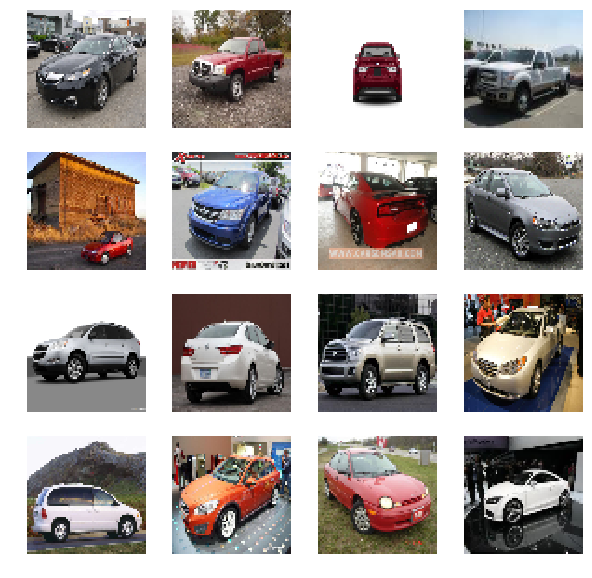

In [8]:
img_col = ImageCollector(np.asarray(images))
img_col.show(np.asarray(images))




In [16]:
# X_train = np.asarray(resized_images)
images[0].shape


(64, 64, 3)

In [10]:
from dcgan_model import DCGAN


In [18]:
tf.reset_default_graph()
dcgan = DCGAN()
dcgan.train(np.asarray(images), iters = 1000)

conv_0_(64, 4, 4, 512)
conv_0_norm_(64, 4, 4, 512)
conv_0_relu_(64, 4, 4, 512)
conv_1_(64, 8, 8, 256)
conv_1_norm_(64, 8, 8, 256)
conv_1_relu_(64, 8, 8, 256)
conv_2_(64, 16, 16, 128)
conv_2_norm_(64, 16, 16, 128)
conv_2_relu_(64, 16, 16, 128)
conv_3_(64, 32, 32, 64)
conv_3_norm_(64, 32, 32, 64)
conv_3_relu_(64, 32, 32, 64)
conv_4_(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
Building my DCGAN
X_train size 8126
new size 8126
Step: 0, D_loss: 1.4198328256607056, G_loss: 0.2768388092517853
Step: 10, D_loss: 0.41469910740852356, G_loss: 1.0837831497192383
Step: 20, D_loss: 0.27057918906211853, G_loss: 1.439840316772461
Step: 30, D_loss: 0.030719488859176636, G_loss: 3.4994237422943115
Step: 40, D_loss: 0.0015589960385113955, G_loss: 6.466196537017822
Step: 50, D_loss: 0.00029033730970695615, G_loss: 8.146392822265625
Step: 60, D_loss: 0.07678760588169098, G_loss: 2.621593475341797
Step: 70, D_loss: 0.004045939538627863, G_loss: 5.514492511749268
Step: 80, D_loss: 0.0002828161232173443, G

KeyboardInterrupt: 

In [4]:
blob = bucket.get_blob('images/Cars/cars_train/00001.jpg')

In [5]:
s = blob.download_as_string()

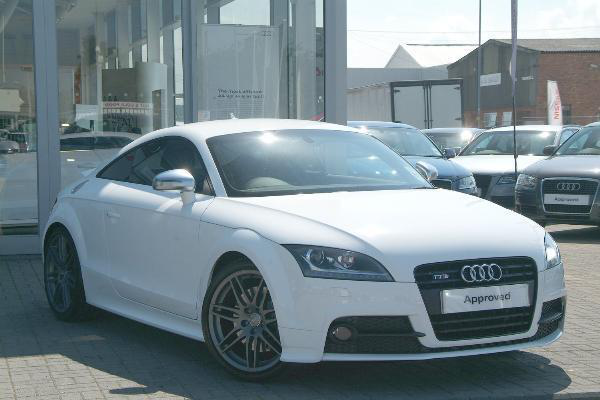

In [37]:
image = Image.open(io.BytesIO(s))
image

In [40]:
np.asarray(image).shape

(400, 600, 3)

In [67]:
t = resized_images[8040]

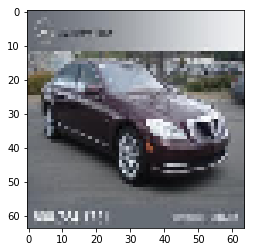

In [68]:
plt.imshow(t)
plt.show()

In [72]:
t.shape == (64,64,3)

True

In [ ]:
celeba_blobs = bucket.list_blobs(prefix='images/CelebA/img_align_celeba/')
celeba_images = [] 

while i < 2000:
    for blob in celeba_blobs:
        blob = bucket.get_blob(blob.name)
        s = blob.download_as_string()
        img = Image.open(io.BytesIO(s))
        resized_img = cv2.resize(np.asarray(img),(64,64))
        if resized_img.shape == (64,64,3):
            celeba_images.append(resized_img)
        i = i+1

In [24]:

# celeba_blobs = bucket.list_blobs(prefix='images/CelebA/img_align_celeba/')
# for blob in celeba_blobs:
#     print(blob.name)
#         blob = bucket.get_blob(blob.name)
#         s = blob.download_as_string()


images/CelebA/img_align_celeba/.DS_Store
images/CelebA/img_align_celeba/000001.jpg
images/CelebA/img_align_celeba/000002.jpg
images/CelebA/img_align_celeba/000003.jpg
images/CelebA/img_align_celeba/000004.jpg
images/CelebA/img_align_celeba/000005.jpg
images/CelebA/img_align_celeba/000006.jpg
images/CelebA/img_align_celeba/000007.jpg
images/CelebA/img_align_celeba/000008.jpg
images/CelebA/img_align_celeba/000009.jpg
images/CelebA/img_align_celeba/000010.jpg
images/CelebA/img_align_celeba/000011.jpg
images/CelebA/img_align_celeba/000012.jpg
images/CelebA/img_align_celeba/000013.jpg
images/CelebA/img_align_celeba/000014.jpg
images/CelebA/img_align_celeba/000015.jpg
images/CelebA/img_align_celeba/000016.jpg
images/CelebA/img_align_celeba/000017.jpg
images/CelebA/img_align_celeba/000018.jpg
images/CelebA/img_align_celeba/000019.jpg
images/CelebA/img_align_celeba/000020.jpg
images/CelebA/img_align_celeba/000021.jpg
images/CelebA/img_align_celeba/000022.jpg
images/CelebA/img_align_celeba/0000

KeyboardInterrupt: 